In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
'''
  Arguments:
    centerLatitude and centerLongitude are the latitude and longitude of the center point, from which we base all other points on
    distanceBetweenPoints tells us the distance in latitudal/longitudal units between each point we generate
    pointsAway tells us how many points we want to generate away from the center, to get dimensions (if == 3, then we generate 3 points away from the center)

      pointsAway = 1    pointsAway = 2      pointsAway = 3
      x x x             x x x x x           x x x x x x x
      x c x             x x x x x           x x x x x x x
      x x x             x x c x x           x x x x x x x
                        x x x x x           x x x c x x x
                        x x x x x           x x x x x x x
                                            x x x x x x x
                                            x x x x x x x
  create_coordinates will return a (pointsAway*2 + 1) x (poinstAway*2 + 1) numpy array where each index is a tuple with latitude and longitude (lat, lon)
'''
def create_coordinates(centerLatitude, centerLongitude, distanceBetweenPoints, pointsAway):
  maximumDistance = distanceBetweenPoints * pointsAway

  minimumLatitude = centerLatitude - maximumDistance
  maximumLatitude = centerLatitude + maximumDistance
  minimumLongitude = centerLongitude - maximumDistance
  maximumLongitude = centerLongitude + maximumDistance

  # this tells us how many coordinates we need in one direction
  # since we want a grid, the grid is length x length
  length = pointsAway * 2 + 1

  coordinates = np.empty((length, length), dtype=object)
  for i in range(length):
    latitude = minimumLatitude + (distanceBetweenPoints * i)
    for j in range(length):
      longitude = minimumLongitude + (distanceBetweenPoints * j)
      coordinates[i][j] = (latitude, longitude)

  print(coordinates)
  return coordinates

c = create_coordinates(42.713988, -73.653209, 1, 1)

[[(41.713988, -74.653209) (41.713988, -73.653209) (41.713988, -72.653209)]
 [(42.713988, -74.653209) (42.713988, -73.653209) (42.713988, -72.653209)]
 [(43.713988, -74.653209) (43.713988, -73.653209) (43.713988, -72.653209)]]


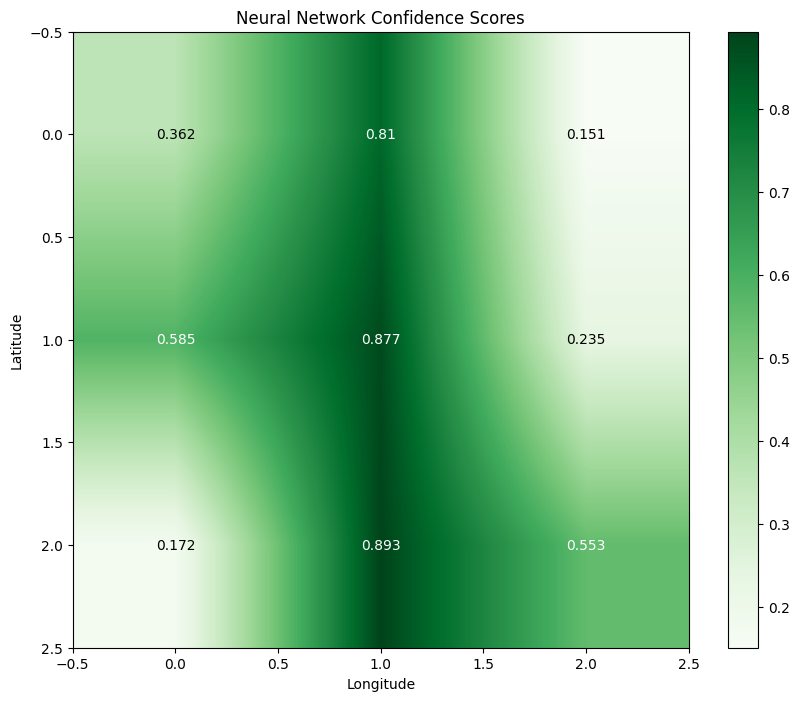

In [43]:
'''
  generate a heatmap based on scores, scores is a numpy array where each index is a value between 0 and 1
'''
def generate_heatmap(scores):
    plt.figure(figsize=(10, 8))  # Set the size of the heatmap
    heatmap = plt.imshow(scores, cmap='Greens', interpolation='bilinear')

    # Adding annotations
    # Choose text color based on the background color
    for i in range(scores.shape[0]):
        for j in range(scores.shape[1]):
            color = "black" if scores[i, j] < 0.5 else "white"  # Adjust threshold as needed
            plt.text(j, i, np.round(scores[i, j], 3),
                     ha="center", va="center", color=color)


    plt.colorbar(heatmap)  # Adds a color bar to the right

    # Customizing the appearance
    plt.title('Neural Network Confidence Scores') # CHANGE NAME
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.show()

# THIS GENERATES RANDOM DATA
size = 3
data = np.round(np.random.rand(size, size), 3)

generate_heatmap(data)